# DARTIS dataset uploading and testing

This is the part of Dartis dataset loading with fusion of images and metadata, showing at the end the check for whether the location and date is correct


In [ ]:
import requests
import zipfile
import os, glob
import pandas as pd
from IPython.display import Image, display

# 🔴 Paste your token here (ONLY in Colab)
TOKEN = "dzvc3ymnix5yvpfkansozxqln7hksqyawywdiwsfj5rhqaoedldzkncexmt4zkrk"

url = "https://download.pangaea.de/dataset/980773/allfiles.zip"
headers = {
    "Authorization": f"Bearer {TOKEN}",
    "Accept": "application/x-download"
}

# -----------------------------
# 1) DOWNLOAD
# -----------------------------
print("Downloading allfiles.zip ...")
r = requests.get(url, headers=headers, stream=True)

print("HTTP status:", r.status_code)
if r.status_code != 200:
    raise SystemExit(f"❌ Download failed: {r.status_code} {r.reason}")

with open("allfiles.zip", "wb") as f:
    for chunk in r.iter_content(chunk_size=8192):
        if chunk:
            f.write(chunk)

# Print file size
zip_size_mb = os.path.getsize("allfiles.zip") / (1024 * 1024)
print(f"✅ Download complete: allfiles.zip ({zip_size_mb:.2f} MB)")

# -----------------------------
# 2) UNZIP
# -----------------------------
os.makedirs("data_980773", exist_ok=True)
with zipfile.ZipFile("allfiles.zip", "r") as zf:
    zf.extractall("data_980773")

print("Extracted to data_980773")

# Count total extracted files
file_count = sum(len(files) for _, _, files in os.walk("data_980773"))
print(f"📁 Total extracted files: {file_count}")

# =====================================================
# 3) LOAD METADATA FROM DARTIS_2019.tab
# =====================================================
# can be downloaded from https://doi.pangaea.de/10.1594/PANGAEA.980773?format=textfile

meta_file = "DARTIS_2019.tab"  # this is the file you downloaded via "tab-delimited text"

# We know from inspection:
# - Header line is at index 48 (0-based)
#   => we skip the first 48 lines so that line 48 becomes the header.
header_skip = 48

df = pd.read_csv(
    meta_file,
    sep="\t",
    skiprows=header_skip,
    encoding="utf-8"
)

# Drop empty / unnamed columns if any
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

print("Loaded metadata table:", df.shape)
print("Columns:")
print(df.columns.tolist())
display(df.head(3))

HTTP status: 200
✅ Download complete: allfiles.zip (479.43 MB)
Extracted to data_980773
📁 Total extracted files: 5020
Loaded metadata table: (5515, 31)
Columns:
['Image set (subset; oc : oil/coast; ow : ...)', 'IMAGE (jpg_file)', 'Binary (xml_file)', 'ID (tag)', 'ID (patch_name)', 'Date/Time (start_time)', 'Date/Time (end_time)', 'ID (Sentinel_ID)', 'Width [pixel] (patch_width)', 'Height [pixel] (patch_height)', 'Longitude (patch_ul_lon)', 'Latitude (patch_ul_lat)', 'Longitude (patch_ur_lon)', 'Latitude (patch_ur_lat)', 'Longitude (patch_br_lon)', 'Latitude (patch_br_lat)', 'Longitude (patch_bl_lon)', 'Latitude (patch_bl_lat)', 'Longitude (obj_ul_lon)', 'Latitude (obj_ul_lat)', 'Longitude (obj_ur_lon)', 'Latitude (obj_ur_lat)', 'Longitude (obj_br_lon)', 'Latitude (obj_br_lat)', 'Longitude (obj_bl_lon)', 'Latitude (obj_bl_lat)', 'Pos X [pixel] (obj_patchloc_xmin)', 'Pos Y [pixel] (obj_patchloc_ymin)', 'Pos X [pixel] (obj_patchloc_xmax)', 'Pos Y [pixel] (obj_patchloc_ymax)', 'Size [pixel

,Image set (subset; oc : oil/coast; ow : ...),IMAGE (jpg_file),Binary (xml_file),ID (tag),ID (patch_name),Date/Time (start_time),Date/Time (end_time),ID (Sentinel_ID),Width [pixel] (patch_width),Height [pixel] (patch_height),...,Latitude (obj_ur_lat),Longitude (obj_br_lon),Latitude (obj_br_lat),Longitude (obj_bl_lon),Latitude (obj_bl_lat),Pos X [pixel] (obj_patchloc_xmin),Pos Y [pixel] (obj_patchloc_ymin),Pos X [pixel] (obj_patchloc_xmax),Pos Y [pixel] (obj_patchloc_ymax),Size [pixel] (label_size)
0,ow,ow-0001.jpg,ow-0001.xml,ow-0001-01-000001,S1_20190101_034235_034350_VV_1,2019-01-01T03:42:35,2019-01-01T03:43:50,S1B_IW_GRDH_1SDV_20190101T034300_20190101T0343...,640,640,...,33.263734,33.054535,33.255456,33.059407,33.254776,345.0,297.0,368.0,343.0,1058.0
1,ow,ow-0002.jpg,ow-0002.xml,ow-0002-01-000002,S1_20190104_155638_155818_VV_2,2019-01-04T15:56:38,2019-01-04T15:58:18,S1A_IW_GRDH_1SDV_20190104T155703_20190104T1557...,640,640,...,31.680507,32.031087,31.691326,32.024630,31.690382,309.0,282.0,340.0,342.0,1860.0
2,ow,ow-0003.jpg,ow-0003.xml,ow-0003-01-000003,S1_20190110_155611_155635_VV_9,2019-01-10T15:56:11,2019-01-10T15:56:35,S1B_IW_GRDH_1SDV_20190110T155611_20190110T1556...,640,640,...,31.571906,30.631705,31.575859,30.621997,31.574357,297.0,309.0,344.0,331.0,1034.0


In [ ]:
# -----------------------------
# 4) FIND & SHOW IMAGES (.jpg)
# -----------------------------
jpg_files = glob.glob("data_980773/**/*.jpg", recursive=True)

print(f"🖼️ Found {len(jpg_files)} JPG images")

🖼️ Found 3655 JPG images


In [ ]:
# =====================================================
# 5) MATCH EACH IMAGE TO DATE/TIME + LOCATION
# =====================================================

import os

# 5.1 find image column (e.g. 'IMAGE (jpg_file)' or similar)
image_col = "IMAGE (jpg_file)"
df["image_name"] = df[image_col].astype(str).str.strip()
# If needed, ensure lowercase match
df["image_name"] = df["image_name"].str.lower()

print("Using image column:", image_col)

# ensure clean image names
df["image_name"] = df[image_col].astype(str).str.strip()

# 5.2 date/time columns
dt_cols = [c for c in df.columns if "date/time" in c.lower()]
print("Date/Time columns:", dt_cols)
start_col = dt_cols[0] if len(dt_cols) > 0 else None
end_col   = dt_cols[1] if len(dt_cols) > 1 else None

# 5.3 lon/lat columns (all of them)
lon_cols = [c for c in df.columns if "lon" in c.lower()]
lat_cols = [c for c in df.columns if "lat" in c.lower()]
print("Longitude columns:", lon_cols)
print("Latitude columns:", lat_cols)

# build slim metadata table
keep_cols = ["image_name"]
if start_col: keep_cols.append(start_col)
if end_col:   keep_cols.append(end_col)
keep_cols += lon_cols + lat_cols

meta_small = df[keep_cols].copy()
if start_col:
    meta_small = meta_small.rename(columns={start_col: "start_time"})
if end_col:
    meta_small = meta_small.rename(columns={end_col: "end_time"})

# 5.4 build dataframe of images on disk
images_df = pd.DataFrame({
    "image_path": jpg_files,
    "image_name": [os.path.basename(p).lower() for p in jpg_files]
})

# 5.5 merge: each jpg → row with time + location
image_info = images_df.merge(meta_small, on="image_name", how="left")

print("\n🧾 Image + date/time + location (first 5 rows):")
display(image_info.head())

# Optional: save to CSV
image_info.to_csv("image_date_time_location.csv", index=False)
print("💾 Saved image_date_time_location.csv")


Using image column: IMAGE (jpg_file)
Date/Time columns: ['Date/Time (start_time)', 'Date/Time (end_time)']
Longitude columns: ['Longitude (patch_ul_lon)', 'Longitude (patch_ur_lon)', 'Longitude (patch_br_lon)', 'Longitude (patch_bl_lon)', 'Longitude (obj_ul_lon)', 'Longitude (obj_ur_lon)', 'Longitude (obj_br_lon)', 'Longitude (obj_bl_lon)']
Latitude columns: ['Latitude (patch_ul_lat)', 'Latitude (patch_ur_lat)', 'Latitude (patch_br_lat)', 'Latitude (patch_bl_lat)', 'Latitude (obj_ul_lat)', 'Latitude (obj_ur_lat)', 'Latitude (obj_br_lat)', 'Latitude (obj_bl_lat)']

🧾 Image + date/time + location (first 5 rows):


,image_path,image_name,start_time,end_time,Longitude (patch_ul_lon),Longitude (patch_ur_lon),Longitude (patch_br_lon),Longitude (patch_bl_lon),Longitude (obj_ul_lon),Longitude (obj_ur_lon),Longitude (obj_br_lon),Longitude (obj_bl_lon),Latitude (patch_ul_lat),Latitude (patch_ur_lat),Latitude (patch_br_lat),Latitude (patch_bl_lat),Latitude (obj_ul_lat),Latitude (obj_ur_lat),Latitude (obj_br_lat),Latitude (obj_bl_lat)
0,data_980773/nw-1440-09-000016.jpg,nw-1440-09-000016.jpg,2019-02-07T03:34:54,2019-02-07T03:36:34,35.912437,35.777892,35.753092,35.887637,NaN,NaN,NaN,NaN,34.746181,34.766464,34.651222,34.630940,NaN,NaN,NaN,NaN
1,data_980773/nw-0858-05-000112.jpg,nw-0858-05-000112.jpg,2019-09-26T03:59:36,2019-09-26T04:01:16,29.787575,29.652252,29.627392,29.762715,NaN,NaN,NaN,NaN,35.540731,35.561000,35.445695,35.425426,NaN,NaN,NaN,NaN
2,data_980773/nc-0022-00-000022.jpg,nc-0022-00-000022.jpg,2019-04-07T03:42:34,2019-04-07T03:43:49,33.212631,33.077725,33.052842,33.187747,NaN,NaN,NaN,NaN,31.312232,31.332518,31.217361,31.197075,NaN,NaN,NaN,NaN
3,data_980773/nw-0586-03-000083.jpg,nw-0586-03-000083.jpg,2019-06-10T15:47:48,2019-06-10T15:49:28,33.549956,33.684673,33.659879,33.525161,NaN,NaN,NaN,NaN,32.935918,32.956187,33.071620,33.051352,NaN,NaN,NaN,NaN
4,data_980773/ow-0056.jpg,ow-0056.jpg,2019-02-22T15:47:45,2019-02-22T15:49:25,32.144325,32.277138,32.251403,32.118590,32.253225,32.25447,32.254068,32.252823,31.788649,31.810004,31.925263,31.903908,31.811196,31.811396,31.813197,31.812997


💾 Saved image_date_time_location.csv



Searching for specific image: ow-0001.jpg
✅ Image found: data_980773/ow-0001.jpg


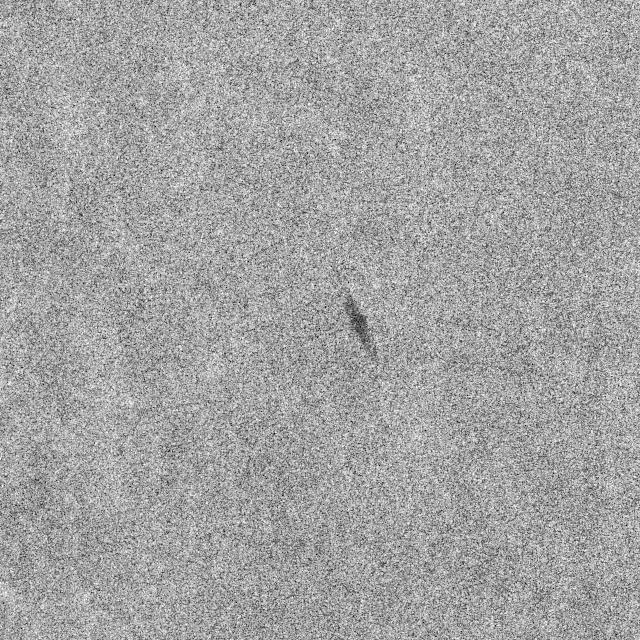

In [ ]:
# -----------------------------
# 5) DISPLAY SPECIFIC IMAGE
# -----------------------------
target_name = "ow-0001.jpg"

target_matches = [
    f for f in jpg_files
    if os.path.basename(f).lower() == target_name.lower()
]

print(f"\nSearching for specific image: {target_name}")

if target_matches:
    print("✅ Image found:", target_matches[0])
    display(Image(filename=target_matches[0], width=400))
else:
    print("❌ Could not find image:", target_name)


✅ Image found: data_980773/ow-0001.jpg


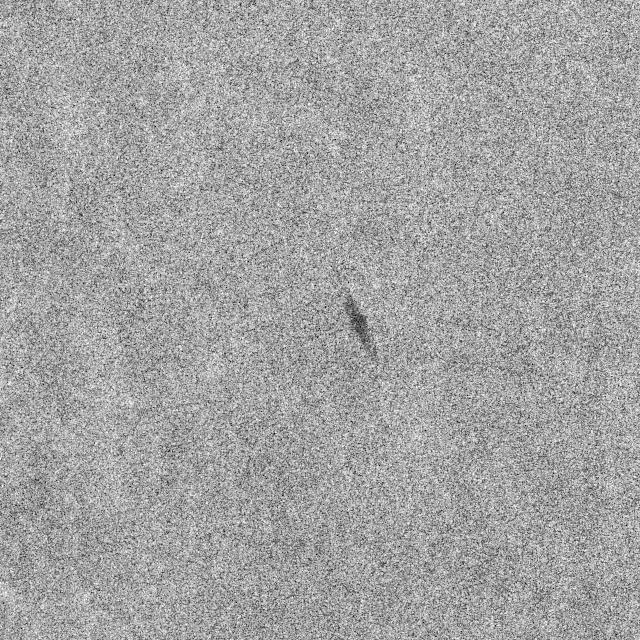


📌 METADATA FOR ow-0001.jpg
--------------------------------------
Start Time: 2019-01-01T03:42:35
End Time:   2019-01-01T03:43:50

🌍 LOCATION (object upper-left):
Latitude : 33.2630544636042
Longitude: 33.0610206397016

📍 LOCATION (patch upper-left):
Latitude : 33.3063075949622
Longitude: 33.1445256369044


In [ ]:
# ==========================================
# 6) SHOW SPECIFIC IMAGE WITH METADATA
# ==========================================

target_name = "ow-0001.jpg".lower()

# 1) Find image path
target_path = None
for f in jpg_files:
    if os.path.basename(f).lower() == target_name:
        target_path = f
        break

if target_path is None:
    print("❌ Image not found:", target_name)
else:
    print("✅ Image found:", target_path)
    display(Image(filename=target_path, width=400))

    # 2) Find metadata
    row = image_info[image_info["image_name"] == target_name]

    if row.empty:
        print("⚠️ No metadata found for this image.")
    else:
        row = row.iloc[0]

        print("\n📌 METADATA FOR", target_name)
        print("--------------------------------------")
        print("Start Time:", row.get("start_time"))
        print("End Time:  ", row.get("end_time"))

        # Location: use object upper-left corner as example
        print("\n🌍 LOCATION (object upper-left):")
        print("Latitude :", row.get("Latitude (obj_ul_lat)"))
        print("Longitude:", row.get("Longitude (obj_ul_lon)"))

        # If you prefer patch location instead
        print("\n📍 LOCATION (patch upper-left):")
        print("Latitude :", row.get("Latitude (patch_ul_lat)"))
        print("Longitude:", row.get("Longitude (patch_ul_lon)"))


yz4px65czgsjsslf44zu2kg63k34zk4udo3y36feansu6sw4oe7rfobcxv2td2en

# Uplodaing location to Google Earth Engine and Downloading the results

In [ ]:
!pip install earthengine-api geemap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.4 MB/s eta 0:00:00


In [ ]:
import ee
import geemap

# Authenticate (only needed once)
ee.Authenticate()

# IMPORTANT — use your Earth Engine project ID here
ee.Initialize(project='senior-project-477806')

print("Earth Engine initialized.")

Earth Engine initialized.


In [ ]:
targets = ["ow-0001.jpg","ow-0002.jpg","ow-0003.jpg","ow-0004.jpg","ow-0005.jpg"]
targets = [t.lower() for t in targets]

# Keep ALL columns so polygons still exist
subset = image_info[image_info["image_name"].isin(targets)].copy()

# (Optional) convenience columns for center/quick check:
subset["lat_center"] = subset["Latitude (obj_ul_lat)"]
subset["lon_center"] = subset["Longitude (obj_ul_lon)"]

subset[["image_name", "start_time", "lat_center", "lon_center"]].head()


,image_name,start_time,lat_center,lon_center
340,ow-0001.jpg,2019-01-01T03:42:35,33.263054,33.061021
1790,ow-0003.jpg,2019-01-10T15:56:11,31.570404,30.622838
2505,ow-0004.jpg,2019-01-10T15:56:11,31.708369,31.189367
2506,ow-0004.jpg,2019-01-10T15:56:11,31.754721,31.236827
2507,ow-0004.jpg,2019-01-10T15:56:11,31.711453,31.181634


In [ ]:
def make_polygon(row, prefix):
    """prefix = 'patch' or 'obj'"""
    coords = [
        [row[f"Longitude ({prefix}_ul_lon)"], row[f"Latitude ({prefix}_ul_lat)"]],
        [row[f"Longitude ({prefix}_ur_lon)"], row[f"Latitude ({prefix}_ur_lat)"]],
        [row[f"Longitude ({prefix}_br_lon)"], row[f"Latitude ({prefix}_br_lat)"]],
        [row[f"Longitude ({prefix}_bl_lon)"], row[f"Latitude ({prefix}_bl_lat)"]],
        [row[f"Longitude ({prefix}_ul_lon)"], row[f"Latitude ({prefix}_ul_lat)"]] # close polygon
    ]
    return coords


In [ ]:
row0 = subset.iloc[0]
print(make_polygon(row0, "patch"))
print(make_polygon(row0, "obj"))


[[np.float64(33.1445256369044), np.float64(33.3063075949622)], [np.float64(33.0089451408765), np.float64(33.3252260245976)], [np.float64(32.9864942079466), np.float64(33.2100446700746)], [np.float64(33.1220747039746), np.float64(33.1911262404391)], [np.float64(33.1445256369044), np.float64(33.3063075949622)]]
[[np.float64(33.0610206397016), np.float64(33.2630544636042)], [np.float64(33.0561482156256), np.float64(33.2637343446692)], [np.float64(33.0545345548213), np.float64(33.2554556848129)], [np.float64(33.0594069788973), np.float64(33.2547758037478)], [np.float64(33.0610206397016), np.float64(33.2630544636042)]]


In [ ]:
from IPython.display import Image as IPyImage, display

results = []   # to store URLs and metadata

for _, row in subset.iterrows():
    name = row["image_name"]
    print(f"\n=== Processing {name} ===")

    # 1) Build polygons from all 4 corners
    patch_coords = make_polygon(row, "patch")
    obj_coords   = make_polygon(row, "obj")

    patch_geom = ee.Geometry.Polygon([patch_coords])
    obj_geom   = ee.Geometry.Polygon([obj_coords])

    # 2) Date window ±1 day
    t = ee.Date(row["start_time"])
    startDate = t.advance(-2, "day")
    endDate   = t.advance(+2, "day")
    print("Date window:", startDate.getInfo(), "→", endDate.getInfo())

    # 3) Sentinel-2 collection with cloud mask
    def maskS2(img):
        scl = img.select('SCL')
        mask = (scl.neq(3)
                  .And(scl.neq(8))
                  .And(scl.neq(9))
                  .And(scl.neq(10))
                  .And(scl.neq(11)))
        return img.updateMask(mask)

    col = (ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
             .filterBounds(patch_geom)
             .filterDate(startDate, endDate)
             .map(maskS2))

    # 3a) Check if there are any images in the collection
    count = col.size().getInfo()
    print("Number of S2 images in window:", count)
    if count == 0:
        print("⚠️ No Sentinel-2 data for this geometry/time, skipping.")
        continue

    # 4) Build median composite
    s2 = col.median()

    # 5) SWIR composite
    composite = s2.select(['B12', 'B11', 'B8']).rename(['red', 'green', 'blue'])

    # 6) Clip to patch and object polygons
    composite_patch = composite.clip(patch_geom)
    composite_obj   = composite.clip(obj_geom)

    # 7) Get thumbnail URLs
    patch_url = composite_patch.getThumbURL({
        'min': 0, 'max': 3000, 'scale': 20,
        'region': patch_geom
    })
    obj_url = composite_obj.getThumbURL({
        'min': 0, 'max': 3000, 'scale': 20,
        'region': obj_geom
    })

    results.append({
        "image": name,
        "patch_url": patch_url,
        "object_url": obj_url
    })

    print("Patch URL:", patch_url)
    print("Object URL:", obj_url)

    # 8) Optionally display immediately
    display(IPyImage(url=patch_url))
    display(IPyImage(url=obj_url))



=== Processing ow-0001.jpg ===
Date window: {'type': 'Date', 'value': 1546141355000} → {'type': 'Date', 'value': 1546486955000}
Number of S2 images in window: 2
Patch URL: https://earthengine.googleapis.com/v1/projects/senior-project-477806/thumbnails/05aadde5f091146cbf21c6076b26b1b7-c7f1775d1b3ddc50579f23d7447b7c6e:getPixels
Object URL: https://earthengine.googleapis.com/v1/projects/senior-project-477806/thumbnails/e648a100517e67ca21088ac4f32775b9-1b2c2f2e01c1dd2966932b8ee149622c:getPixels



=== Processing ow-0003.jpg ===
Date window: {'type': 'Date', 'value': 1546962971000} → {'type': 'Date', 'value': 1547308571000}
Number of S2 images in window: 2
Patch URL: https://earthengine.googleapis.com/v1/projects/senior-project-477806/thumbnails/e51cccf69509adad10ef87a071ebac31-2328f924ede17e69bea943cb009969a9:getPixels
Object URL: https://earthengine.googleapis.com/v1/projects/senior-project-477806/thumbnails/3ae7663c10a8fcbdb0ea46d77b4f7c91-be799104b1432b020d06e7e2f8879a87:getPixels



=== Processing ow-0004.jpg ===
Date window: {'type': 'Date', 'value': 1546962971000} → {'type': 'Date', 'value': 1547308571000}
Number of S2 images in window: 2
Patch URL: https://earthengine.googleapis.com/v1/projects/senior-project-477806/thumbnails/820d2124227a040011dd4d5ed3b71c56-be0ddc550cbaea7dbae162a2cc9a9adb:getPixels
Object URL: https://earthengine.googleapis.com/v1/projects/senior-project-477806/thumbnails/7f618025b1af1d66a426099246e0a543-6aa5d367e7b3e90f0f570c409266b09d:getPixels



=== Processing ow-0004.jpg ===
Date window: {'type': 'Date', 'value': 1546962971000} → {'type': 'Date', 'value': 1547308571000}
Number of S2 images in window: 2
Patch URL: https://earthengine.googleapis.com/v1/projects/senior-project-477806/thumbnails/820d2124227a040011dd4d5ed3b71c56-5eefa09525b18ab852c29ad59b6be946:getPixels
Object URL: https://earthengine.googleapis.com/v1/projects/senior-project-477806/thumbnails/b8ee68c169b258aee573c86acc7507df-8cd9d2cdd6bc49f6491d7afce992a5fe:getPixels



=== Processing ow-0004.jpg ===
Date window: {'type': 'Date', 'value': 1546962971000} → {'type': 'Date', 'value': 1547308571000}
Number of S2 images in window: 2
Patch URL: https://earthengine.googleapis.com/v1/projects/senior-project-477806/thumbnails/820d2124227a040011dd4d5ed3b71c56-93cc3ff79c24bc6ef144e51f0dc01c90:getPixels
Object URL: https://earthengine.googleapis.com/v1/projects/senior-project-477806/thumbnails/3f0607aeca42106d4ce8b880669d592f-4a3711b29fcfcc1f47705a593b136d5a:getPixels



=== Processing ow-0002.jpg ===
Date window: {'type': 'Date', 'value': 1546444598000} → {'type': 'Date', 'value': 1546790198000}
Number of S2 images in window: 4
Patch URL: https://earthengine.googleapis.com/v1/projects/senior-project-477806/thumbnails/cc961bf8c7d1ed3540c0ceaeecc31dd7-b9afbaf184f032e9dbdebaa4567e5e0b:getPixels
Object URL: https://earthengine.googleapis.com/v1/projects/senior-project-477806/thumbnails/3983c4d5743f37c93902582918d88258-cb73789661e7473378ed0d6e7568c822:getPixels



=== Processing ow-0005.jpg ===
Date window: {'type': 'Date', 'value': 1546962971000} → {'type': 'Date', 'value': 1547308571000}
Number of S2 images in window: 1
Patch URL: https://earthengine.googleapis.com/v1/projects/senior-project-477806/thumbnails/2a0f8c39e406da61796dc4e5f9795028-bcaa200cfdf1ef8320db60990ea2ab71:getPixels
Object URL: https://earthengine.googleapis.com/v1/projects/senior-project-477806/thumbnails/c63bb2c934fe7f3157427385b4c77097-7e54fe28fcb70c64fe0ab7448f5f2db4:getPixels



=== Processing ow-0005.jpg ===
Date window: {'type': 'Date', 'value': 1546962971000} → {'type': 'Date', 'value': 1547308571000}
Number of S2 images in window: 1
Patch URL: https://earthengine.googleapis.com/v1/projects/senior-project-477806/thumbnails/2a0f8c39e406da61796dc4e5f9795028-88460642be0c6824ee2bc50c1dae1cc9:getPixels
Object URL: https://earthengine.googleapis.com/v1/projects/senior-project-477806/thumbnails/efc97fa994386c57222c95e5452933dc-b85ebab145feca948489d58c324dbb51:getPixels



=== Processing ow-0005.jpg ===
Date window: {'type': 'Date', 'value': 1546962971000} → {'type': 'Date', 'value': 1547308571000}
Number of S2 images in window: 1
Patch URL: https://earthengine.googleapis.com/v1/projects/senior-project-477806/thumbnails/2a0f8c39e406da61796dc4e5f9795028-d38a0123298e767e151f2f6407aea4bb:getPixels
Object URL: https://earthengine.googleapis.com/v1/projects/senior-project-477806/thumbnails/8c8351e3eb2e827f09d3bf8b91e9a81b-86b29a822c0a88fdf64f6601397b323e:getPixels


In [ ]:
row = subset.iloc[0]  # or select by image_name

# Use all 4 corners of the patch polygon
patch_coords = make_polygon(row, "obj")
patch_geom = ee.Geometry.Polygon([patch_coords])

# Time window around SAR time
t = ee.Date(row["start_time"])
start_date = t.advance(-2, 'day')
end_date   = t.advance(+2, 'day')

s2_col = (ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
          .filterBounds(patch_geom)
          .filterDate(start_date, end_date))

print('Number of S2 images:', s2_col.size().getInfo())

s2_img = ee.Image(s2_col.first())

thumb_url = s2_img.getThumbURL({
    'bands': ['B4','B3','B2'],
    'min': 0,
    'max': 3000,
    'region': patch_geom,
    'scale': 10
})

display(Image(url=thumb_url))


Number of S2 images: 2


This one is to check whether the retrieval from GEE works with test


In [ ]:
import ee
from IPython.display import Image, display
poly_coords = [
    [50.687825959906874,40.20665485985903],  # lon, lat
    [50.87665347455531,40.20665485985903],
    [50.687825959906874,40.29836371136093],
    [50.687825959906874,40.20665485985903],
    [50.687825959906874,40.20665485985903]   # close polygon
]
geom = ee.Geometry.Polygon([poly_coords])

# 2) Date range
start_date = '2022-06-09'
end_date   = '2022-06-10'

# 3) Get Sentinel-2 collection over that polygon + date
s2_col = (ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
          .filterBounds(geom)
          .filterDate(start_date, end_date))

print('Number of images:', s2_col.size().getInfo())

# 4) Take the first image (or .median() if you prefer)
s2_img = ee.Image(s2_col.first())

# 5) Get a simple RGB thumbnail URL and show it
thumb_url = s2_img.getThumbURL({
    'bands': ['B4', 'B3', 'B2'],  # true color
    'min': 0,
    'max': 3000,
    'region': geom,
    'scale': 10
})

print("Thumbnail URL:", thumb_url)
display(Image(url=thumb_url))


Number of images: 1
Thumbnail URL: https://earthengine.googleapis.com/v1/projects/senior-project-477806/thumbnails/606503a4a112ddd29137f3b1f23e69ec-8267751af7d1d121d3a5049d98ea8ac0:getPixels


In [ ]:
import ee
from IPython.display import Image, display
poly_coords = [
    [33.1445256369044	,33.3063075949622],  # lon, lat
    [33.0089451408765,33.3252260245976],
    [32.9864942079466,33.2100446700746],
    [33.1220747039746,33.1911262404391],
    [33.1445256369044	,33.3063075949622]   # close polygon
]
obj_poly_coords = [
    [33.0610206397016,33.2630544636042],  # lon, lat
    [33.0561482156256,33.2637343446692],
    [33.0545345548213,33.2554556848129],
    [33.0594069788973,33.2547758037478],
    [33.0610206397016,33.2630544636042]   # close polygon
]
geom = ee.Geometry.Polygon([poly_coords])
geom2 = ee.Geometry.Polygon([obj_poly_coords])
# 2) Date range
start_date = '2018-12-30'
end_date   = '2019-01-01'

# 3) Get Sentinel-2 collection over that polygon + date
s2_col = (ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
          .filterBounds(geom)
          .filterDate(start_date, end_date))
s2_col2 = (ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
          .filterBounds(geom2)
          .filterDate(start_date, end_date))

print('Number of images:', s2_col.size().getInfo())
print('Number of images for obj:', s2_col2.size().getInfo())
# 4) Take the first image (or .median() if you prefer)
s2_img = ee.Image(s2_col.first())
s2_img2 = ee.Image(s2_col2.first())
# 5) Get a simple RGB thumbnail URL and show it
thumb_url = s2_img.getThumbURL({
    'bands': ['B4', 'B3', 'B2'],  # true color
    'min': 0,
    'max': 3000,
    'region': geom,
    'scale': 10
})

#objects
thumb_url2 = s2_img2.getThumbURL({
    'bands': ['B4', 'B3', 'B2'],  # true color
    'min': 0,
    'max': 3000,
    'region': geom2,
    'scale': 10
})

print("Thumbnail URL:", thumb_url)
display(Image(url=thumb_url))
display(Image(url=thumb_url2))


Number of images: 2
Number of images for obj: 2
Thumbnail URL: https://earthengine.googleapis.com/v1/projects/senior-project-477806/thumbnails/d0f9ace420a1ceb050ba080ea973ca29-154b13bdf8ad21a98d798ce13c90ffc7:getPixels


In [ ]:
import ee
from IPython.display import Image, display

# Initialize EE if not already done
# ee.Authenticate()
# ee.Initialize(project='senior-project-477806')

# -------------------------------
# 1) Correct polygon (yours had a duplicate point)
# -------------------------------
poly_coords = [
    [50.687825959906874,40.20665485985903],
    [50.87665347455531,40.20665485985903],
    [50.87665347455531,40.29836371136093],
    [50.687825959906874,40.29836371136093],
    [50.687825959906874,40.20665485985903]   # close polygon
]

geom = ee.Geometry.Polygon([poly_coords])

# -------------------------------
# 2) Date range
# -------------------------------
start_date = '2022-06-09'
end_date   = '2022-06-10'

# -------------------------------
# 3) Sentinel-2 collection
# -------------------------------
s2_col = (
    ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
      .filterBounds(geom)
      .filterDate(start_date, end_date)
)

print('Number of images:', s2_col.size().getInfo())

s2 = ee.Image(s2_col.first())

# -------------------------------
# 4) Process: NDVI, NDWI, NDOSI, etc.
# -------------------------------
ndvi = s2.normalizedDifference(['B8','B4']).rename('NDVI')
ndwi = s2.normalizedDifference(['B3','B8']).rename('NDWI')
mndwi = s2.normalizedDifference(['B3','B11']).rename('mNDWI')
ndosi = s2.expression(
    '(R + S - N) / (R + S + N)',
    { 'R': s2.select('B4'),
      'S': s2.select('B11'),
      'N': s2.select('B8')}
).rename('NDOSI')

swir = s2.select(['B12','B11','B8']).rename(['red','green','blue'])

# -------------------------------
# 5) Helper: shrink the image display using SIZE argument
# -------------------------------
def show_small(img, params, label):
    url = img.getThumbURL(params)
    print(label, url)
    display(Image(url=url, width=350))   # <<<<<<<<<< SHRINKED DISPLAY

# -------------------------------
# 6) Display RGB (small)
# -------------------------------
show_small(
    s2.select(['B4','B3','B2']),
    {
        'min': 0, 'max': 3000,
        'region': geom,
        'dimensions': 512   # << shrink actual pixel size
    },
    'RGB:'
)

# -------------------------------
# 7) Display SWIR composite (small)
# -------------------------------
show_small(
    swir,
    {
        'min': 0, 'max': 3000,
        'region': geom,
        'dimensions': 512
    },
    'SWIR:'
)

# -------------------------------
# 8) Display NDOSI (oil index)
# -------------------------------
ndosi_stats = ndosi.reduceRegion(
    reducer=ee.Reducer.percentile([2, 98]),
    geometry=geom,
    scale=20,
    maxPixels=1e9
)

ndosi_min = ndosi_stats.get("NDOSI_p2")
ndosi_max = ndosi_stats.get("NDOSI_p98")

print("Dynamic NDOSI stretch:", ndosi_min.getInfo(), ndosi_max.getInfo())

# Display NDOSI with dynamic stretch
show_small(
    ndosi,
    {
        'min': ndosi_min,
        'max': ndosi_max,
        'palette': ['blue','white','red'],
        'region': geom,
        'dimensions': 512
    },
    'NDOSI_dynamic:'
)

Number of images: 1
RGB: https://earthengine.googleapis.com/v1/projects/senior-project-477806/thumbnails/46ba112f46b53a19b4765e13bcdcc631-b0103969036e65f93ec4310c4725a2ac:getPixels


SWIR: https://earthengine.googleapis.com/v1/projects/senior-project-477806/thumbnails/e6f21307f16b32c091093b0e01333707-3532a84169a098c9a5d3f1f0b4c6c3ef:getPixels


Dynamic NDOSI stretch: 0.2598181542478841 0.3807050318612377
NDOSI_dynamic: https://earthengine.googleapis.com/v1/projects/senior-project-477806/thumbnails/306461e1b227630a6dcf505ea42a00a0-2d20bd9b57aa9846ea3f5c7462feccfa:getPixels


SWIR + NDOSI

In [ ]:
ndosi_overlay = ndosi.visualize(
    min=-0.05, max=0.05,
    palette=['blue','white','red'],
    opacity=0.5
)

swir_vis = swir.visualize(
    min=0, max=3000
)

composite_overlay = ee.ImageCollection([swir_vis, ndosi_overlay]).mosaic()

show_small(
    composite_overlay,
    {
        'region': geom,
        'dimensions': 512
    },
    "SWIR + NDOSI overlay:"
)


SWIR + NDOSI overlay: https://earthengine.googleapis.com/v1/projects/senior-project-477806/thumbnails/9be0c9b2ec2ffc44edc0a93609a0bc1d-0e4bb9959d112cbaf70b8ddeedde1076:getPixels


NDOSI + NDWI + NDVI

In [ ]:
ndvi_vis = ndvi.visualize(min=-0.2, max=0.8, palette=['brown','white','green'], opacity=0.4)
ndwi_vis = ndwi.visualize(min=-0.3, max=0.3, palette=['purple','white','blue'], opacity=0.4)
ndosi_vis = ndosi.visualize(min=-0.05, max=0.05, palette=['blue','white','red'], opacity=0.5)

overlay_all = ee.ImageCollection([swir_vis, ndvi_vis, ndwi_vis, ndosi_vis]).mosaic()

show_small(
    overlay_all,
    {
        'region': geom,
        'dimensions': 512
    },
    "All filters stacked:"
)


All filters stacked: https://earthengine.googleapis.com/v1/projects/senior-project-477806/thumbnails/bdb0f2dad9c915239aed757063325f0e-f7a4d7bf7cf1b2de0606fa91a508e12f:getPixels


Now, we will run through everything; SAR + Optical + filtered + object SAR + object optical

This code shows only day - day images

In [ ]:
# ================================================
# 0. Imports and Initialization
# ================================================
import ee
import os
import requests
from PIL import Image as PILImage
from io import BytesIO
from IPython.display import display
import numpy as np
from PIL import ImageDraw, ImageFont

# ee.Authenticate()
# ee.Initialize(project='senior-project-477806')

# Ensure output directory exists
os.makedirs("outputs", exist_ok=True)

# ================================================
# 1. Helper: polygon construction
# ================================================
def make_polygon(row, prefix):
    """prefix = 'patch' or 'obj'"""
    coords = [
        [row[f"Longitude ({prefix}_ul_lon)"], row[f"Latitude ({prefix}_ul_lat)"]],
        [row[f"Longitude ({prefix}_ur_lon)"], row[f"Latitude ({prefix}_ur_lat)"]],
        [row[f"Longitude ({prefix}_br_lon)"], row[f"Latitude ({prefix}_br_lat)"]],
        [row[f"Longitude ({prefix}_bl_lon)"], row[f"Latitude ({prefix}_bl_lat)"]],
        [row[f"Longitude ({prefix}_ul_lon)"], row[f"Latitude ({prefix}_ul_lat)"]],  # close loop
    ]
    return ee.Geometry.Polygon([coords])

# ================================================
# 2. Helper: Download thumbnail into a PIL Image
# ================================================
def download_thumb(url):
    r = requests.get(url)
    img = PILImage.open(BytesIO(r.content)).convert("RGB")
    # EE thumbnails come out “upside-down” relative to your SAR; flip vertically
    return img.transpose(PILImage.FLIP_LEFT_RIGHT)

# ================================================
# 3. Helper: Build a multi-panel output PNG
# ================================================
def assemble_panel(
        sar_img,
        rgb_patch, swir_patch, ndosi_patch,
        rgb_obj, ndosi_obj):

    # Resize SAR, RGB, SWIR, NDOSI to same width
    panel_w = 512
    sar = sar_img.resize((panel_w, panel_w))
    rgb = rgb_patch.resize((panel_w, panel_w))
    swir = swir_patch.resize((panel_w, panel_w))
    nd  = ndosi_patch.resize((panel_w, panel_w))

    # Object images keep full resolution but fit width
    obj_w = 1024
    obj_rgb = rgb_obj.resize((obj_w, 512))
    obj_nd  = ndosi_obj.resize((obj_w, 512))

    # Compose final canvas
    final_w = max(panel_w*2, obj_w*2)
    final_h = panel_w*2 + 512

    canvas = PILImage.new("RGB", (final_w, final_h), (255,255,255))

    # Row 1: SAR | RGB
    canvas.paste(sar, (0,0))
    canvas.paste(rgb, (panel_w,0))

    # Row 2: SWIR | NDOSI
    canvas.paste(swir, (0,panel_w))
    canvas.paste(nd,  (panel_w,panel_w))

    # Row 3: OBJECT RGB | OBJECT NDOSI
    canvas.paste(obj_rgb, (0,panel_w*2))
    canvas.paste(obj_nd,  (obj_w,panel_w*2))

    return canvas

# ================================================
# 4. MAIN LOOP: Process all OW/OC images
# ================================================
filtered = image_info[image_info["image_name"].str.startswith(("ow","oc"))]

print("Total images to process:", len(filtered))

for idx, row in filtered.iterrows():
    name = row["image_name"]
    print(f"\n=== Processing {name} ===")

    out_dir = f"outputs/{name}"
    os.makedirs(out_dir, exist_ok=True)

    # -------------------------
    # LOAD SAR patch from disk
    # -------------------------
    sar_path = row["image_path"]
    sar_img = PILImage.open(sar_path).convert("RGB")

    # -------------------------
    # Build polygons
    # -------------------------
    patch_geom = make_polygon(row, "patch")
    obj_geom   = make_polygon(row, "obj")

    # -------------------------
    # Sentinel-2 date window
    # -------------------------
    t = ee.Date(row["start_time"])
    start_d = t.advance(-1, "day")
    end_d   = t.advance(+1, "day")

    # -------------------------
    # Load S2 image
    # -------------------------
    s2col = (ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")
             .filterBounds(patch_geom)
             .filterDate(start_d, end_d))

    if s2col.size().getInfo() == 0:
        print("⚠️ No S2 available, skipping")
        continue

    s2 = ee.Image(s2col.first())

    # -------------------------
    # Build indices
    # -------------------------
    rgb = s2.select(['B4','B3','B2'])
    swir = s2.select(['B12','B11','B8'])
    ndosi = s2.expression(
        '(R + S - N) / (R + S + N)',
        {'R': s2.select('B4'),
         'S': s2.select('B11'),
         'N': s2.select('B8')}
    ).rename("NDOSI")

    # -------------------------
    # Dynamic NDOSI min/max per polygon
    # -------------------------
    p_stats = ndosi.reduceRegion(
        ee.Reducer.percentile([2,98]),
        geometry=patch_geom,
        scale=20,
        maxPixels=1e9
    )
    p_min = p_stats.get("NDOSI_p2")
    p_max = p_stats.get("NDOSI_p98")

    o_stats = ndosi.reduceRegion(
        ee.Reducer.percentile([2,98]),
        geometry=obj_geom,
        scale=20,
        maxPixels=1e9
    )
    o_min = o_stats.get("NDOSI_p2")
    o_max = o_stats.get("NDOSI_p98")

    # -------------------------
    # Thumbnail URLs (PATCH)
    # -------------------------
    rgb_patch_url = rgb.getThumbURL({
        'min':0, 'max':3000,
        'region': patch_geom,
        'dimensions':512
    })

    swir_patch_url = swir.getThumbURL({
        'min':0, 'max':3000,
        'region': patch_geom,
        'dimensions':512
    })

    ndosi_patch_url = ndosi.getThumbURL({
        'min': p_min, 'max': p_max,
        'palette':['blue','white','red'],
        'region': patch_geom,
        'dimensions':512
    })

    # -------------------------
    # Thumbnail URLs (OBJECT – NOT SHRINKED)
    # -------------------------
    rgb_obj_url = rgb.getThumbURL({
    'min': 0, 'max': 3000,
    'region': obj_geom,
    'dimensions': 512
    })

    ndosi_obj_url = ndosi.getThumbURL({
    'min': o_min, 'max': o_max,
    'palette': ['blue','white','red'],
    'region': obj_geom,
    'dimensions': 512
    })


    # -------------------------
    # Download thumbnails
    # -------------------------
    rgb_patch   = download_thumb(rgb_patch_url)
    swir_patch  = download_thumb(swir_patch_url)
    ndosi_patch = download_thumb(ndosi_patch_url)
    rgb_obj     = download_thumb(rgb_obj_url)
    ndosi_obj   = download_thumb(ndosi_obj_url)

    # -------------------------
    # Assemble final multi-panel page
    # -------------------------
    final = assemble_panel(
        sar_img,
        rgb_patch, swir_patch, ndosi_patch,
        rgb_obj, ndosi_obj
    )

    # Save
    save_path = f"{out_dir}/{name}_combined.png"
    final.save(save_path)
    print(f"Saved → {save_path}")

    # Optional display
    # display(final)


Total images to process: 3225

=== Processing ow-0056.jpg ===
Saved → outputs/ow-0056.jpg/ow-0056.jpg_combined.png

=== Processing ow-0056.jpg ===
Saved → outputs/ow-0056.jpg/ow-0056.jpg_combined.png

=== Processing ow-0056.jpg ===
Saved → outputs/ow-0056.jpg/ow-0056.jpg_combined.png

=== Processing ow-0056.jpg ===
Saved → outputs/ow-0056.jpg/ow-0056.jpg_combined.png

=== Processing ow-0056.jpg ===
Saved → outputs/ow-0056.jpg/ow-0056.jpg_combined.png

=== Processing ow-0056.jpg ===
Saved → outputs/ow-0056.jpg/ow-0056.jpg_combined.png

=== Processing oc-0002.jpg ===
Saved → outputs/oc-0002.jpg/oc-0002.jpg_combined.png

=== Processing oc-0002.jpg ===
Saved → outputs/oc-0002.jpg/oc-0002.jpg_combined.png

=== Processing ow-0343.jpg ===
Saved → outputs/ow-0343.jpg/ow-0343.jpg_combined.png

=== Processing ow-0343.jpg ===
Saved → outputs/ow-0343.jpg/ow-0343.jpg_combined.png

=== Processing ow-0343.jpg ===
Saved → outputs/ow-0343.jpg/ow-0343.jpg_combined.png

=== Processing ow-0343.jpg ===
Sav

Saved → outputs/ow-0343.jpg/ow-0343.jpg_combined.png

=== Processing ow-0343.jpg ===


Saved → outputs/ow-0343.jpg/ow-0343.jpg_combined.png

=== Processing ow-0343.jpg ===
Saved → outputs/ow-0343.jpg/ow-0343.jpg_combined.png

=== Processing ow-0343.jpg ===
Saved → outputs/ow-0343.jpg/ow-0343.jpg_combined.png

=== Processing ow-0343.jpg ===
Saved → outputs/ow-0343.jpg/ow-0343.jpg_combined.png

=== Processing ow-0248.jpg ===
Saved → outputs/ow-0248.jpg/ow-0248.jpg_combined.png

=== Processing ow-0248.jpg ===
Saved → outputs/ow-0248.jpg/ow-0248.jpg_combined.png

=== Processing ow-0248.jpg ===
Saved → outputs/ow-0248.jpg/ow-0248.jpg_combined.png

=== Processing ow-0248.jpg ===
Saved → outputs/ow-0248.jpg/ow-0248.jpg_combined.png

=== Processing ow-0248.jpg ===
Saved → outputs/ow-0248.jpg/ow-0248.jpg_combined.png

=== Processing ow-0248.jpg ===
Saved → outputs/ow-0248.jpg/ow-0248.jpg_combined.png

=== Processing ow-0248.jpg ===
Saved → outputs/ow-0248.jpg/ow-0248.jpg_combined.png

=== Processing ow-0248.jpg ===
Saved → outputs/ow-0248.jpg/ow-0248.jpg_combined.png

=== Process

KeyboardInterrupt: 

Without object only SAR + Optical + Optical with filters side by side;
+-1 day window

TASKS: Read how the filter for optical works;
Read what each filter shows and differentiates;

The problems: The images are all different in the way they are represented;
Some are mirrored, some are upside down;
It also creates a folder even if nothing is found
There is an error when the EG gives not image but error page
Add a checker that will put the dots in the right places
Or can we find the images between the window and take the minimal window image and then provide the window numerical value (if from +-1 then 1, if the image exist in window +-3 only and not earlier, then write 3);
Do the same with the cloudiness; choose an image with lowest cloudiness

Can also try to do the opposite. Take the marinext data optical and then find SAR images

In [ ]:
# ================================================
# 0. Imports and Initialization
# ================================================
import ee
import os
import requests
from PIL import Image as PILImage
from io import BytesIO
from IPython.display import display
import numpy as np
from PIL import ImageDraw, ImageFont

# ee.Authenticate()
# ee.Initialize(project='senior-project-477806')

# Ensure output directory exists
os.makedirs("outputs", exist_ok=True)

# ================================================
# 1. Helper: polygon construction
# ================================================
def make_polygon(row, prefix):
    """prefix = 'patch' or 'obj'"""
    coords = [
        [row[f"Longitude ({prefix}_ul_lon)"], row[f"Latitude ({prefix}_ul_lat)"]],
        [row[f"Longitude ({prefix}_ur_lon)"], row[f"Latitude ({prefix}_ur_lat)"]],
        [row[f"Longitude ({prefix}_br_lon)"], row[f"Latitude ({prefix}_br_lat)"]],
        [row[f"Longitude ({prefix}_bl_lon)"], row[f"Latitude ({prefix}_bl_lat)"]],
        [row[f"Longitude ({prefix}_ul_lon)"], row[f"Latitude ({prefix}_ul_lat)"]],  # close loop
    ]
    return ee.Geometry.Polygon([coords])

# ================================================
# 2. Helper: Download thumbnail into a PIL Image
# ================================================
def download_thumb(url):
    r = requests.get(url)
    img = PILImage.open(BytesIO(r.content)).convert("RGB")
    # EE thumbnails come out “upside-down” relative to your SAR; flip vertically
    return img.transpose(PILImage.FLIP_LEFT_RIGHT)

# ================================================
# 3. Helper: Build a multi-panel output PNG
# ================================================
def assemble_panel(
        sar_img,
        rgb_patch, swir_patch, ndosi_patch,
        rgb_obj, ndosi_obj):

    # Resize SAR, RGB, SWIR, NDOSI to same width
    panel_w = 512
    sar = sar_img.resize((panel_w, panel_w))
    rgb = rgb_patch.resize((panel_w, panel_w))
    swir = swir_patch.resize((panel_w, panel_w))
    nd  = ndosi_patch.resize((panel_w, panel_w))

    # Object images keep full resolution but fit width
    obj_w = 1024
    obj_rgb = rgb_obj.resize((obj_w, 512))
    obj_nd  = ndosi_obj.resize((obj_w, 512))

    # Compose final canvas
    final_w = max(panel_w*2, obj_w*2)
    final_h = panel_w*2 + 512

    canvas = PILImage.new("RGB", (final_w, final_h), (255,255,255))

    # Row 1: SAR | RGB
    canvas.paste(sar, (0,0))
    canvas.paste(rgb, (panel_w,0))

    # Row 2: SWIR | NDOSI
    canvas.paste(swir, (0,panel_w))
    canvas.paste(nd,  (panel_w,panel_w))

    # Row 3: OBJECT RGB | OBJECT NDOSI
    canvas.paste(obj_rgb, (0,panel_w*2))
    canvas.paste(obj_nd,  (obj_w,panel_w*2))

    return canvas

# ================================================
# 4. MAIN LOOP: Process all OW/OC images
# ================================================
filtered = image_info[image_info["image_name"].str.startswith(("ow","oc"))]

print("Total images to process:", len(filtered))

for idx, row in filtered.iterrows():
    name = row["image_name"]
    print(f"\n=== Processing {name} ===")

    out_dir = f"outputs/{name}"
    os.makedirs(out_dir, exist_ok=True)

    # -------------------------
    # LOAD SAR patch from disk
    # -------------------------
    sar_path = row["image_path"]
    sar_img = PILImage.open(sar_path).convert("RGB")

    # -------------------------
    # Build polygons
    # -------------------------
    patch_geom = make_polygon(row, "patch")
    obj_geom   = make_polygon(row, "obj")

    # -------------------------
    # Sentinel-2 date window
    # -------------------------
    t = ee.Date(row["start_time"])
    start_d = t.advance(-1, "day")
    end_d   = t.advance(+1, "day")

    # -------------------------
    # Load S2 image
    # -------------------------
    s2col = (ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")
             .filterBounds(patch_geom)
             .filterDate(start_d, end_d))

    if s2col.size().getInfo() == 0:
        print("⚠️ No S2 available, skipping")
        continue

    s2 = ee.Image(s2col.first())

    # -------------------------
    # Build indices
    # -------------------------
    rgb = s2.select(['B4','B3','B2'])
    swir = s2.select(['B12','B11','B8'])
    ndosi = s2.expression(
        '(R + S - N) / (R + S + N)',
        {'R': s2.select('B4'),
         'S': s2.select('B11'),
         'N': s2.select('B8')}
    ).rename("NDOSI")

    # -------------------------
    # Dynamic NDOSI min/max per polygon
    # -------------------------
    p_stats = ndosi.reduceRegion(
        ee.Reducer.percentile([2,98]),
        geometry=patch_geom,
        scale=20,
        maxPixels=1e9
    )
    p_min = p_stats.get("NDOSI_p2")
    p_max = p_stats.get("NDOSI_p98")

    o_stats = ndosi.reduceRegion(
        ee.Reducer.percentile([2,98]),
        geometry=obj_geom,
        scale=20,
        maxPixels=1e9
    )
    o_min = o_stats.get("NDOSI_p2")
    o_max = o_stats.get("NDOSI_p98")

    # -------------------------
    # Thumbnail URLs (PATCH)
    # -------------------------
    rgb_patch_url = rgb.getThumbURL({
        'min':0, 'max':3000,
        'region': patch_geom,
        'dimensions':512
    })

    swir_patch_url = swir.getThumbURL({
        'min':0, 'max':3000,
        'region': patch_geom,
        'dimensions':512
    })

    ndosi_patch_url = ndosi.getThumbURL({
        'min': p_min, 'max': p_max,
        'palette':['blue','white','red'],
        'region': patch_geom,
        'dimensions':512
    })

    # -------------------------
    # Thumbnail URLs (OBJECT – NOT SHRINKED)
    # -------------------------
    rgb_obj_url = rgb.getThumbURL({
    'min': 0, 'max': 3000,
    'region': obj_geom,
    'dimensions': 512
    })

    ndosi_obj_url = ndosi.getThumbURL({
    'min': o_min, 'max': o_max,
    'palette': ['blue','white','red'],
    'region': obj_geom,
    'dimensions': 512
    })


    # -------------------------
    # Download thumbnails
    # -------------------------
    rgb_patch   = download_thumb(rgb_patch_url)
    swir_patch  = download_thumb(swir_patch_url)
    ndosi_patch = download_thumb(ndosi_patch_url)
    rgb_obj     = download_thumb(rgb_obj_url)
    ndosi_obj   = download_thumb(ndosi_obj_url)

    # -------------------------
    # Assemble final multi-panel page
    # -------------------------
    final = assemble_panel(
        sar_img,
        rgb_patch, swir_patch, ndosi_patch,
        rgb_obj, ndosi_obj
    )

    # Save
    save_path = f"{out_dir}/{name}_combined.png"
    final.save(save_path)
    print(f"Saved → {save_path}")

    # Optional display
    # display(final)


https://colab.research.google.com/drive/1LgxH4mA6IJ5XRkq7_OgQX4E3PHDu6oFa?usp=sharing